<a href="https://colab.research.google.com/github/Ranya-Alghamdi-1/T5/blob/main/Week_5_Task_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 38.5MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DF = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'])
DF.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

<Axes: >

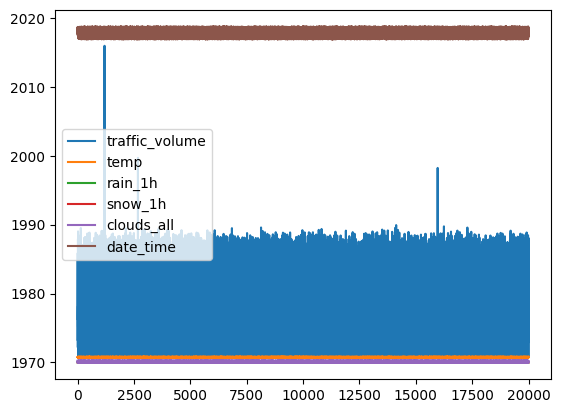

In [ ]:
DF.plot()

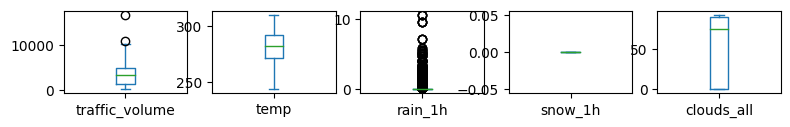

In [ ]:
#Plot boxplot for every col to detect outliers
import matplotlib.pyplot as plt
DF.plot(kind='box', subplots=True, layout=(8,8), figsize=(15, 10))
#plt.xticks(rotation=90)

plt.show()

In [ ]:
DF.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [ ]:
#handle outliers
def remove_outliers(TRAFFIC, column):
    Q1 = DF[column].quantile(0.25)
    Q3 = DF[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return DF[(DF[column] >= lower_bound) & (DF[column] <= upper_bound)]

DF = remove_outliers(DF,"rain_1h")
DF = remove_outliers(DF,"traffic_volume")
DF = remove_outliers(DF,"snow_1h")
DF = remove_outliers(DF,"clouds_all")
DF = remove_outliers(DF,"temp")

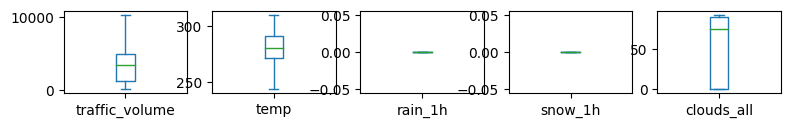

In [ ]:
#Check again
DF.plot(kind='box', subplots=True, layout=(8,8), figsize=(15, 10))
plt.show()

In [ ]:
 index_col='date_time'

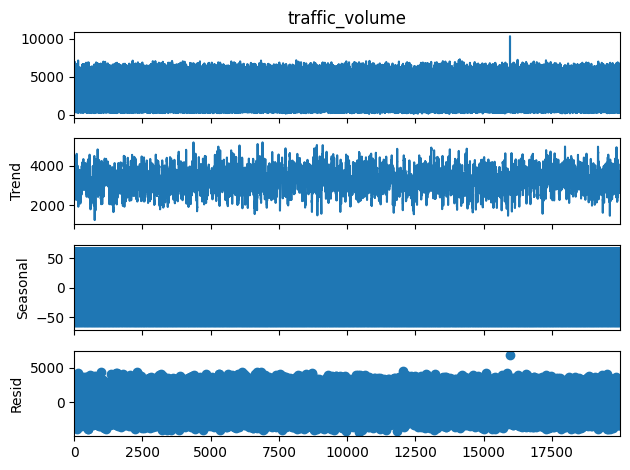

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

time_series_data = DF['traffic_volume']

# Decompose the time series
result = seasonal_decompose(time_series_data, model='additive', period=12)
result.plot()
plt.show()

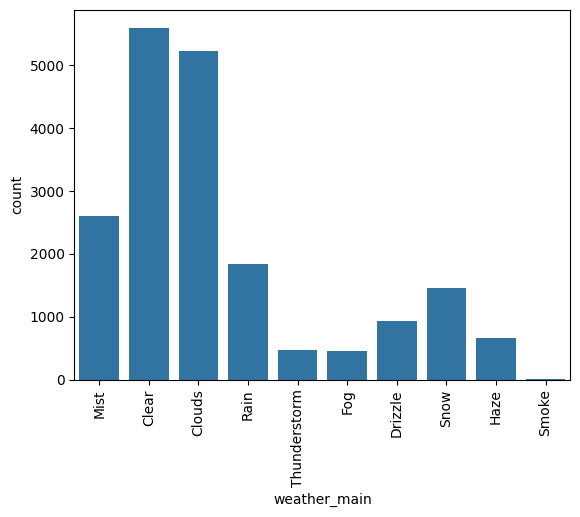

In [ ]:
#Create a plot for weather_main
sns.countplot(x='weather_main', data=DF)
plt.xticks(rotation=90)
plt.show()

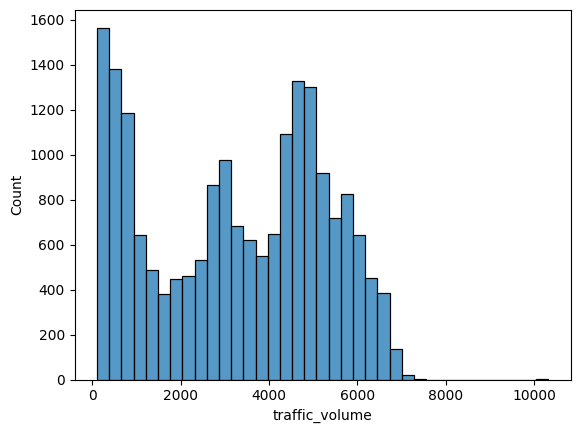

In [ ]:
#Create a histogram traffic_volum
sns.histplot(DF['traffic_volume'])
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
DF.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
#Check for unique values in every col
for col in DF.columns:
    unique_values = DF[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'traffic_volume': [1209. 1248. 4602. ... 6742. 1783. 1132.]
Unique values in column 'temp': [291.15 286.01 293.69 ... 249.88 269.23 289.06]
Unique values in column 'rain_1h': [0.]
Unique values in column 'snow_1h': [0.]
Unique values in column 'clouds_all': [90  1 75  5 40 20  0  8 88 68 92 44 48 32 12 36 80 24 64 76]
Unique values in column 'weather_main': ['Mist' 'Clear' 'Clouds' 'Rain' 'Thunderstorm' 'Fog' 'Drizzle' 'Snow'
 'Haze' 'Smoke']
Unique values in column 'weather_description': ['mist' 'sky is clear' 'broken clouds' 'moderate rain'
 'proximity shower rain' 'proximity thunderstorm' 'fog' 'light rain'
 'overcast clouds' 'light intensity drizzle' 'scattered clouds'
 'proximity thunderstorm with rain' 'light snow' 'haze' 'few clouds'
 'heavy intensity rain' 'snow' 'drizzle' 'heavy intensity drizzle'
 'Sky is Clear' 'heavy snow' 'thunderstorm with heavy rain'
 'light shower snow' 'thunderstorm' 'shower drizzle'
 'thunderstorm with light rain' 'thunderstorm

In [ ]:
DF.duplicated().sum()

12

In [ ]:
#Drop duplicate values
DF.drop_duplicates(inplace=True)

In [ ]:
DF.duplicated().sum()

0

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


Step 1: Create the prev_traffic_volume Column

In [ ]:
# Shift traffic_volume by 24 hours to get the previous day's traffic volume
DF['prev_traffic_volume'] = DF['traffic_volume'].shift(24)

Step 2: Calculate the Difference Between traffic_volume Values


In [ ]:
# Calculate the difference in traffic volume
DF['traffic_volume_diff'] = DF['traffic_volume'].diff()

Extract Date Features


In [ ]:
# Extract day of the week (0=Monday, 6=Sunday)
DF['day_of_week'] = DF['date_time'].dt.dayofweek

# Extract month
DF['month'] = DF['date_time'].dt.month

# Extract day of the year
DF['day_of_year'] = DF['date_time'].dt.dayofyear

Handle Missing Values


In [ ]:
# Drop rows with missing values
DF.dropna(inplace=True)

In [ ]:
DF.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
25,5402.0,265.55,0.0,0.0,1,Mist,mist,2018-02-14 06:00:00,1209.0,-300.0,2,2,45
26,935.0,291.15,0.0,0.0,90,Mist,mist,2018-06-20 04:00:00,1248.0,-4467.0,2,6,171
27,2087.0,266.72,0.0,0.0,90,Snow,light snow,2018-02-19 19:00:00,4602.0,1152.0,0,2,50
28,3016.0,275.01,0.0,0.0,1,Clear,sky is clear,2017-10-11 05:00:00,2838.0,929.0,2,10,284
29,2757.0,252.72,0.0,0.0,1,Clear,sky is clear,2018-01-04 05:00:00,5794.0,-259.0,3,1,4


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

Sort the Data by date_time


In [ ]:
# Sort the data by date_time
DF = DF.sort_values(by='date_time')

In [ ]:
split_ratio = 0.8
split_index = int(len(DF) * split_ratio)

# Split the dataset into training and testing sets
train_data = DF.iloc[:split_index]
test_data = DF.iloc[split_index:]

# Verify the split
print(f"Training set size: {train_data.shape}")
print(f"Testing set size: {test_data.shape}")


Training set size: (15383, 13)
Testing set size: (3846, 13)


In [ ]:
print(f"Training set date range: {train_data['date_time'].min()} to {train_data['date_time'].max()}")
print(f"Testing set date range: {test_data['date_time'].min()} to {test_data['date_time'].max()}")

Training set date range: 2016-11-18 15:00:00 to 2018-04-27 17:00:00
Testing set date range: 2018-04-27 18:00:00 to 2018-09-30 23:00:00


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
train_data_dropped = train_data.drop(columns=['date_time', 'weather_main', 'weather_description'])
test_data_dropped = test_data.drop(columns=['date_time', 'weather_main', 'weather_description'])

print("Columns in training data after dropping non-numeric columns:")
print(train_data_dropped.columns)

print("Columns in testing data after dropping non-numeric columns:")
print(test_data_dropped.columns)

Columns in training data after dropping non-numeric columns:
Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'prev_traffic_volume', 'traffic_volume_diff', 'day_of_week', 'month',
       'day_of_year'],
      dtype='object')
Columns in testing data after dropping non-numeric columns:
Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'prev_traffic_volume', 'traffic_volume_diff', 'day_of_week', 'month',
       'day_of_year'],
      dtype='object')


In [ ]:

# Apply (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(train_data_dropped)
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data_dropped.columns)

test_data_scaled = scaler.transform(test_data_dropped)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data_dropped.columns)

#Add Date if i need it
train_data_scaled['date_time'] = train_date_time.values
test_data_scaled['date_time'] = test_date_time.values


In [ ]:
# Verify the scaling
print(train_data_scaled.head())
print(test_data_scaled.head())

   traffic_volume      temp  rain_1h  snow_1h  clouds_all  \
0        0.664016  0.482320      0.0      0.0    0.978261   
1        0.664016  0.482320      0.0      0.0    0.978261   
2        0.664016  0.482320      0.0      0.0    0.978261   
3        0.692200  0.478548      0.0      0.0    0.978261   
4        0.692200  0.478548      0.0      0.0    0.978261   

   prev_traffic_volume  traffic_volume_diff  day_of_week     month  \
0             0.022950             0.688504     0.666667  0.909091   
1             0.321302             0.521578     0.666667  0.909091   
2             0.224696             0.679513     0.666667  0.909091   
3             0.363672             0.748561     0.666667  0.909091   
4             0.450275             0.849137     0.666667  0.909091   

   day_of_year           date_time  
0     0.882192 2016-11-18 15:00:00  
1     0.882192 2016-11-18 15:00:00  
2     0.882192 2016-11-18 15:00:00  
3     0.882192 2016-11-18 16:00:00  
4     0.882192 2016-11-18 1

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

Prepare

In [ ]:
# Ensure all columns except the target are numeric
features = train_data_scaled.columns.drop('traffic_volume')
numeric_features = train_data_scaled[features].select_dtypes(include=[np.number]).columns

def create_sequences(data, target_column, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length][numeric_features].values  # Use only numeric columns
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 24  # the past 24 hours

X_train, y_train = create_sequences(train_data_scaled, 'traffic_volume', sequence_length)
X_test, y_test = create_sequences(test_data_scaled, 'traffic_volume', sequence_length)


In [ ]:
print(X_train.dtype)
print(X_train.shape)


object
(15359, 24, 10)


Training for GRU model

In [ ]:
from tensorflow.keras.layers import Input

gru_model = Sequential([
    Input(shape=(sequence_length, X_train.shape[2])),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(1)  # Output layer
])

gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the GRU model
history_gru = gru_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - loss: 0.0476 - val_loss: 0.0330
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 0.0299 - val_loss: 0.0276
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0269 - val_loss: 0.0237
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0248 - val_loss: 0.0221
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 0.0230 - val_loss: 0.0193
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0224 - val_loss: 0.0193
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0212 - val_loss: 0.0180
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 0.0194 - val_loss: 0.0169
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0183 - val_loss: 0.0200
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - loss: 0.0179 - val_loss: 0.0160
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 0.0171 - val_loss: 0.0162
Epoch 12/30
384/384 ━━━━━━━━━━

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
# Make predictions on the test set
y_pred_gru = gru_model.predict(X_test)

120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)

print(f"GRU Model MAE: {mae_gru}")
print(f"GRU Model MSE: {mse_gru}")
print(f"GRU Model RMSE: {rmse_gru}")

GRU Model MAE: 0.08989805009083666
GRU Model MSE: 0.01815583720652415
GRU Model RMSE: 0.1347435980168414


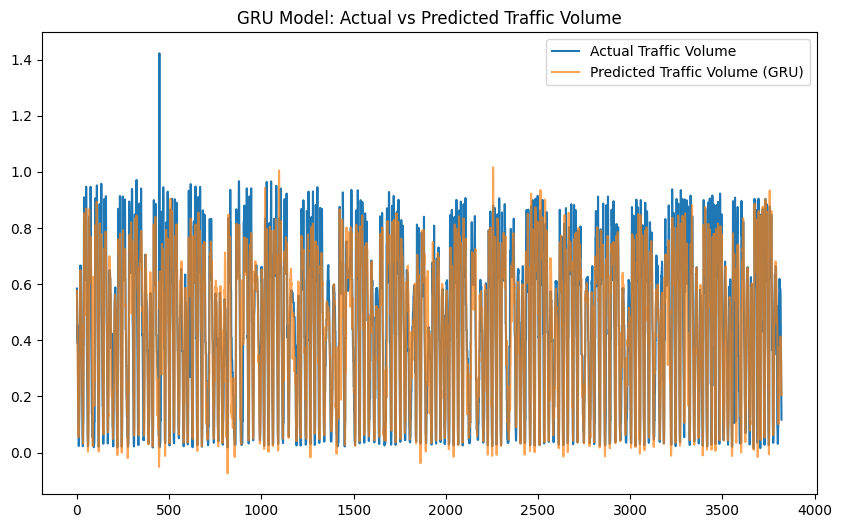

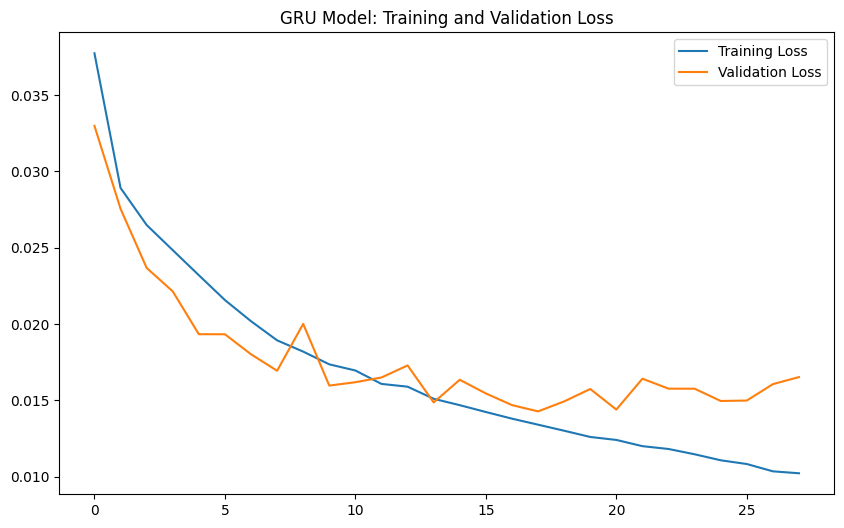

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Traffic Volume')
plt.plot(y_pred_gru, label='Predicted Traffic Volume (GRU)', alpha=0.7)
plt.title('GRU Model: Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model: Training and Validation Loss')
plt.legend()
plt.show()

LSTM

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
lstm_model = Sequential([
    Input(shape=(sequence_length, X_train.shape[2])),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)  # Output layer
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 0.0808 - val_loss: 0.0292
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0294 - val_loss: 0.0244
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0241 - val_loss: 0.0247
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0227 - val_loss: 0.0206
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0213 - val_loss: 0.0216
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0212 - val_loss: 0.0188
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0196 - val_loss: 0.0198
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0186 - val_loss: 0.0177
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0181 - val_loss: 0.0178
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0169 - val_loss: 0.0170
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0167 - val_loss: 0.0166
Epoch 12/30
384/384 ━━━━━━━━━━━

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
# Make predictions on the test set
y_pred_lstm = lstm_model.predict(X_test)


120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM Model MAE: {mae_lstm}")
print(f"LSTM Model MSE: {mse_lstm}")
print(f"LSTM Model RMSE: {rmse_lstm}")

LSTM Model MAE: 0.09569661669817153
LSTM Model MSE: 0.019863796985381224
LSTM Model RMSE: 0.14093898319975642


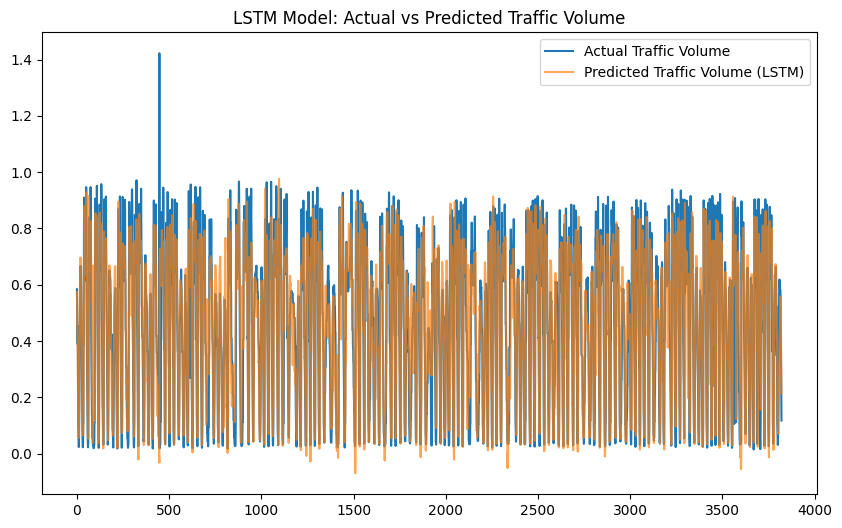

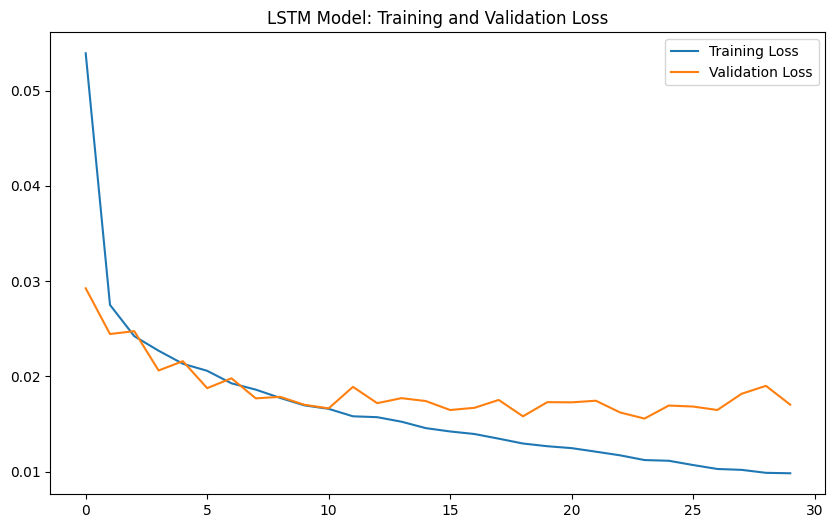

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Traffic Volume')
plt.plot(y_pred_lstm, label='Predicted Traffic Volume (LSTM)', alpha=0.7)
plt.title('LSTM Model: Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model: Training and Validation Loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:


- Data Preprocessing
Normalization was chosen to scale features between 0 and 1, ensuring the model processes inputs efficiently.


- Feature Engineering
Extracted time-based features (day of the week, month, etc.) from the date_time column.

- Model Architecture
The GRU and LSTM models were selected for their effectiveness in capturing long-term dependencies in time series data. The architecture with stacked layers and an output-dense layer was appropriate for predicting continuous values like traffic volume.

- Training Process
A batch size of 32 and 30 epochs was chosen to balance between computational efficiency and model convergence. The Adam optimizer was used for its adaptive learning rate


- Loss Function and Metrics
 MSE was chosen as the loss function because it heavily penalizes large errors, aligning to minimize prediction errors. MAE and RMSE were used as evaluation metrics to provide a clear understanding of the model's performance.

- Model Tuning
Early stopping prevented overfitting by halting training when validation loss stopped improving. This improved the model's generalization on unseen data.

- Overfitting and Underfitting
The model showed minimal signs of overfitting, as seen in the validation loss.

- Future Improvements
Further improvements could include experimenting with additional features, hyperparameter tuning, or trying different model